# Probability & Statistics: I

*Davide Gerosa (Milano-Bicocca)*

##### Reading:

- [Ivezic textbook](https://press.princeton.edu/books/hardcover/9780691198309/statistics-data-mining-and-machine-learning-in-astronomy) Chapter 3. 
- [David Hogg: "Data analysis recipes: Probability calculus for inference"](https://arxiv.org/abs/1205.4446)


This course is based on previous work by many people. See [here]((https://github.com/dgerosa/astrostatistics_bicocca_2022/blob/main/README.md) for credits.


---

## Preliminaries and notation <a class="anchor" id="one"></a>

* **"Statistics"** = extracting knowledge from data.
* **"Astrostatistics"** = extracting knowledge from astronomical data.
* **"Knowledge"** = summary (physical or phenomenological) of data behavior.
* **"Data"** = result of measurements.

In the textbook, $x$ is a scalar quantity that is measured $N$ times to form a dataset.

* $x_i$ is a single measurement with $i=1,...,N$.
* $\{x_i\}$ refers to the set of all N measurements comprising the dataset. 

Our data can be real numbers, discrete labels (strings or numbers), or even "missing values" (we sometimes pad our datasets with NaNs in this case). 

**Goal of data mining & statistical inference:**
> We are generally trying to *estimate* $h(x)$, the *true* generating distribution from which $\{x_i\}$ are drawn. 

* $h(x)$ is the **probability density (distribution) function** or the **"pdf"** and $h(x)dx$ is the propobability of a value lying between $x$ and $x+dx$. This distribution can have several levels-- the population distribution of events (e.g. source redshifts), and a measurement uncertainity distribution that blurs our measured data away from true values.

* The "left to right" integral of $h(x)$ is the **cumulative distribution function** (**"cdf"**), $H(x) = \int_{-\infty}^x h(x')dx'$. The inverse function of the cdf is the **quantile function**, e.g. what $x$ value has 90% of the distribution below it?

* While $h(x)$ is the "true" pdf (or **population** pdf).  What we *measure* from the data is the **empirical** pdf, which is denoted $f(x)$.  So, $f(x)$ is a *model* of $h(x)$.  In principle, with infinite data $f(x) \rightarrow h(x)$, but in reality the blurring effect of measurement errors keep this from being strictly true. Likewise, the empirical cdf is denoted $F(x)$.

* If we are attempting to guess a physical *model* for $h(x)$, then the process is ***parametric***.  With a model solution we can generate new data that should mimic what we measure.  If we are not attempting to guess a model, then the process is ***non-parametric***, i.e. we are just trying to describe the data behavior in a compact practical way.

### Picturing (i.e. understanding!) a pdf is not a trivial task!

Let's see an example. This cell will start with a generating distribution $h(x)$, draw a number of random samples as data $\{x_i\}$, and then fit these data with a parametric and non-parametric model $f(x)$.

In [14]:
# Based on Ivezic v2, Figure 6.8; edited by G. T. Richards, S. R. Taylor, and D. Gerosa

# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general

import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

from sklearn.neighbors import KernelDensity

from astropy.visualization import hist
from sklearn.mixture import GaussianMixture

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=14, usetex=True)
%config InlineBackend.figure_format='retina' # very useful command for high-res images

In [15]:
#------------------------------------------------------------
# Generate our data: a mix of several Cauchy distributions
# In reality nature generates data for you


random_state = np.random.RandomState(seed=0)
N = 2000 # number of data points
mu_gamma_f = [(5, 1.0, 0.1),
              (7, 0.5, 0.5),
              (9, 0.1, 0.1),
              (12, 0.5, 0.2),
              (14, 1.0, 0.1)]
hx = lambda x: sum([f * stats.cauchy(mu, gamma).pdf(x)
                          for (mu, gamma, f) in mu_gamma_f])
x = np.concatenate([stats.cauchy(mu, gamma).rvs(int(f * N), random_state=random_state)
                    for (mu, gamma, f) in mu_gamma_f])
random_state.shuffle(x)
x = x[x > -10]
x = x[x < 30]

In [16]:
# These are the numbers you have. 
#Say these are stellar flux measurements, or a time series from a gravitational-wave detector

print(x.tolist())

[8.952596638950636, 6.942533358935216, 11.857502968790328, 7.9673676256550765, 8.339793768997136, 9.104030518710326, 9.034882898224481, 9.00066149734176, 12.068202801788292, 12.43803660691054, 9.171912910373514, 9.32457387753589, 12.793456190615046, 7.649754269389245, 6.957712694613811, 5.212342443874667, -0.5858969407576264, 10.819198381549345, 6.001707605068017, 12.208739158947212, 15.623442221914669, 9.12180574588649, 12.097206156705552, 11.752914357372388, 7.624716805403909, 9.127190737797093, 4.72461107622859, 7.039304136974619, 5.608240319346324, 6.5331353251927435, 6.595590247300794, 14.350048371783956, 6.734318572151493, 7.01540998481395, 9.000751889624222, 5.691289191711737, 12.940548902826198, 8.951356409071611, 4.261082360738824, 7.074183889581066, 7.773505002260368, 7.599377398071211, 7.578337462319974, 6.661074122722392, 7.032526365073723, 3.7013711421608306, 14.14247265328622, 15.2022714128919, 4.756113643850473, 5.3798787765960085, 6.710777342736699, 7.121288020008638, 8

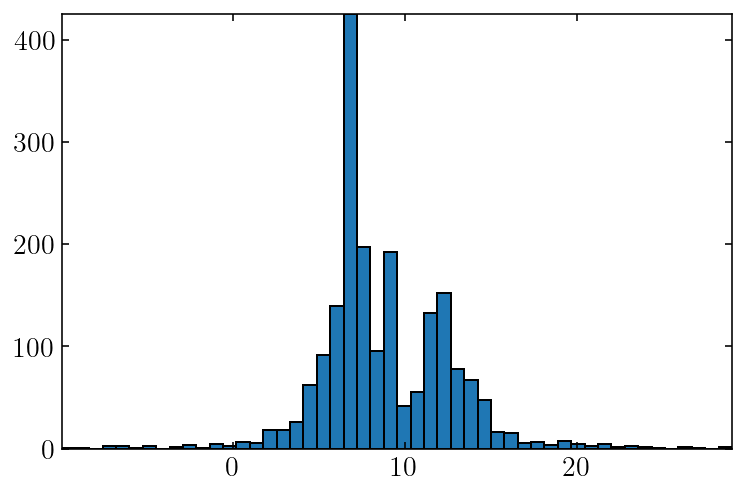

In [21]:
#Let's do the easiest thing ever.
plt.hist(x, bins=50);

try to change the bins the conclusions may change... do these features depend on binning or is it the physics?

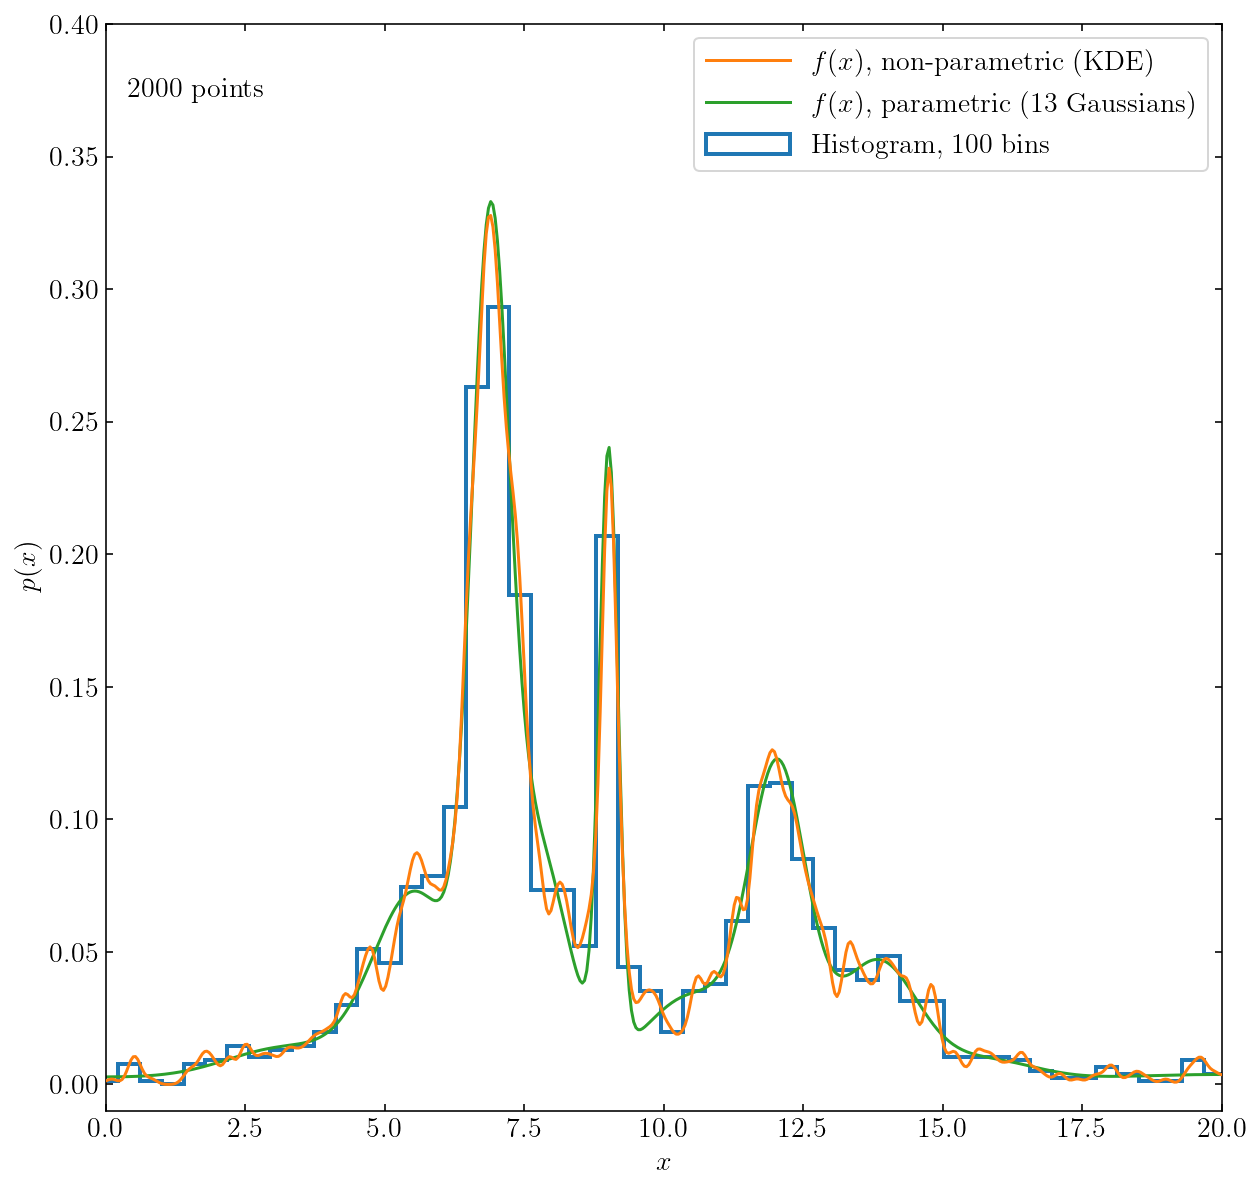

In [18]:
#------------------------------------------------------------
# plot the results
fig,ax = plt.subplots(figsize=(10, 10))
xgrid = np.linspace(-10, 30, 1000)

# True distribution: you typically don't have it! Only have the samples!
if False:
    ax.plot(xgrid, hx(xgrid), ':', color='black', zorder=3,
            label="$h(x)$, Generating Distribution")

# A simple histogram
# But try changing the number of bins!
if True:
    ax.hist(x,density=True,color='C0',bins=100,histtype='step',lw=2, label='Histogram, 100 bins')

# Something more sophisticated: Kernel Density Estimation
# But try changing the bandwith! 
if True:
    kde = KernelDensity(bandwidth=0.1, kernel='gaussian')
    kde.fit(x[:, None])
    dens_kde = np.exp(kde.score_samples(xgrid[:, None]))
    ax.plot(xgrid, dens_kde, '-', color='C1', zorder=3,
            label="$f(x)$, non-parametric (KDE)")

# Use Gaussian Mixtures with a pre-defined number of clusters (13)
if True:
    gmm = GaussianMixture(n_components=13).fit(x.reshape(-1, 1))
    logprob = gmm.score_samples(xgrid.reshape(-1, 1))
    fx = lambda j : np.exp(gmm.score_samples(j.reshape(-1, 1)))
    ax.plot(xgrid, fx(np.array(xgrid)), '-', color='C2',
            label="$f(x)$, parametric (13 Gaussians)")

# Plot cosmetics
ax.text(0.02, 0.95, "%i points" % N, ha='left', va='top',
            transform=ax.transAxes)

ax.set_ylabel('$p(x)$',fontsize=14)
ax.legend(loc='upper right')

ax.set_xlabel('$x$',fontsize=14)
ax.set_xlim(0, 20)
ax.set_ylim(-0.01, 0.4001)

plt.show()

In [19]:
# For instance in a single point:
print(hx(7.132))             # h(x), the true distribution

print(fx(np.array([7.132]))) # f(x) for a parametric model
print(np.exp(kde.score_samples(np.atleast_2d(7.132)))) # f(x) for non-parametric model

0.3062100869598303
[0.27981875]
[0.26087616]


### A note on uncertainties and errors

* Technically, errors are systematic biases that we can not mitigate through collecting lots and lots of data. 
* Statistical uncertainties are the result of random measurement uncertainty. 
* But "error" will be used for both, and denoted as either statistical errors (error bars) or systematic errors (biases).


* Statistical error distributions (error bars) that vary from data point to data point are called **heteroscedastic errors** (e.g. errors due to galaxy extinction on galaxy luminosities). If they are the same for all points then they are **homoscedastic errors**.

##  We could summarize the goal of this course as an attempt to 

1) estimate $f(x)$ from some real (possibly multi-dimensional) data set, 

2) find a way to describe $f(x)$ and its uncertainty, 

3) compare it to models of $h(x)$, and then 

4) use the knowledge that we have gained to interpret/predict new measurements.

## Probability <a class="anchor" id="two"></a>

> $p(A)$ = the probability of $A$ (or the probability density at $A$), 

e.g. the probability that an observed object is a galaxy. This does not mean that the object is in some sort of Schrodinger's cat quantum uncertainity...*the probability reflects our current state of knowledge of the object, and our belief that it is a galaxy*. 

### Probability axioms (Kolmogorov)

1. $p(A)\geq0 \quad\forall\, A$
2. $p(\Omega) = 1$, where $\Omega$ is the set of all outcomes, i.e. the sum/integral of all possible outcomes is unity
3. $p(\cup_{i=1}^\infty A_i) = \sum_{i=1}^\infty p(A_i)$ if all events are independent

$A \cup B$ is the *union* of sets $A$ and $B$. **Read as A OR B.**

$A \cap B$ is the *intersection* of sets $A$ and $B$. **Read as A AND B.** Different notations $p(A \cap B) = p(AB) = p(A,B) = p(A\,\mathrm{and}\,B)$. We will use the comma notation throughout. 

If we have two events, $A$ and $B$, the possible combinations are illustrated by the following figure:
![Figure 3.1](http://www.astroml.org/_images/fig_prob_sum_1.png)

* The probability that ***either*** $A$ ***or*** $B$ will happen (which could include both) is the *union*, given by
$$p(A \cup B) = p(A) + p(B) - p(A \cap B)$$
The figure makes it clear why the last term is necessary.  Since $A$ and $B$ overlap, we are double-counting the region where *both* $A$ and $B$ happen, so we have to subtract this out.  


* The probability that ***both*** $A$ ***and*** $B$ will happen, $p(A \cap B)$, is 
$$p(A \cap B) = p(A|B)p(B) = p(B|A)p(A)$$
where p(A|B) is the probability of A *given that* B is true and is called the **conditional probability**.  So the $|$ is short for "given".


* The **law of total probability** says that (for independent $B_i$)
$$p(A) = \sum_ip(A|B_i)p(B_i)$$

It is important to realize that the following is *always* true:

$$p(A,B) = p(A|B)p(B) = p(B|A)p(A)$$

However, if $A$ and $B$ are independent, then $p(A|B)=p(A)$ and $p(B|A)=p(B)$ and

$$p(A,B) = p(A)p(B)$$

**EXAMPLE** (classic marbles in bag scenario)

If you have a bag with 5 marbles (3 yellow and 2 blue) and you want to know the probability of picking 2 yellow marbles in a row, that would be

$$p(Y_1,Y_2) = p(Y_1)p(Y_2|Y_1).$$

$p(Y_1) = \frac{3}{5}$ since you have an equally likely chance of drawing any of the 5 marbles.

If you did not put the first marble back in the back after drawing it (sampling *without* "replacement"), then the probability

$p(Y_2|Y_1) = \frac{2}{4}$, so that

$$p(Y_1,Y_2) = \frac{3}{5}\frac{2}{4} = \frac{3}{10}.$$

But if you put the first marble back, then

$p(Y_2|Y_1) = \frac{3}{5} = p(Y_2)$, so that 

$$p(Y_1,Y_2) = \frac{3}{5}\frac{3}{5} = \frac{9}{25}.$$

In the first case $A$ and $B$ (or rather $Y_1$ and $Y_2$) are *not* independent, whereas in the second case they are.

**Need more help with this?**  Try watching some Khan Academy videos and working through the exercises:
* [https://www.khanacademy.org/math/probability/probability-geometry](https://www.khanacademy.org/math/probability/probability-geometry)
* [https://www.khanacademy.org/math/precalculus/prob-comb](https://www.khanacademy.org/math/precalculus/prob-comb)

---

## Bayes' Theorem <a class="anchor" id="three"></a>

In the following figure, we have a 2-D distribution in $x-y$ parameter space.  Here $x$ and $y$ are ***not*** independent as, once you pick a $y$, your values of $x$ are constrained.

![http://www.astroml.org/_images/fig_conditional_probability_1.png](http://www.astroml.org/_images/fig_conditional_probability_1.png)

We have that 
$$p(x,y) = p(x|y)p(y) = p(y|x)p(x)$$

We can define the ***marginal probability*** as
$$p(x) = \int p(x,y)dy,$$

where marginal means projecting on to one axis (integrating over the unwanted variable). The **marginal** distributions are shown on the left and bottom sides of the left panel.  As the equation above says, this is just the integral along the $x$ direction for a given $y$ (left side panel) or the integral along the $y$ direction for a given $x$ (bottom panel).  

The three panels on the right show the ***conditional probability*** (of $x$) for three $y$ values: $$p(x|y=y_0)$$  These are just normalized "slices" through the 2-D distribution.

The marginal probability of $x$ can be re-written as

$$p(x) = \int p(x|y)p(y) dy$$

But since $p(x|y)p(y) = p(y|x)p(x)$, we can write

> $$p(y|x) = \frac{p(x|y)p(y)}{p(x)} = \frac{p(x|y)p(y)}{\int p(x|y)p(y) dy}$$

which in words says that

> the (conditional) probability of $y$ given $x$ is just the (conditional) probability of $x$ given $y$ times the (marginal) probability of $y$ divided by the (marginal) probability of $x$, where the latter is just the integral of the numerator.

This is **Bayes' Theorem**, which itself is not at all controversial, though its application can be as we'll discuss later.

## Bayes' Theorem Example: Lego's <a class="anchor" id="four"></a>

An example with Lego's (it's awesome, let's have a look!):
[https://www.countbayesie.com/blog/2015/2/18/bayes-theorem-with-lego](https://www.countbayesie.com/blog/2015/2/18/bayes-theorem-with-lego)\

(This example comes from a very nice book: [Bayesian Statistics the Fun Way](https://www.amazon.com/Bayesian-Statistics-Fun-Will-Kurt/dp/1593279566/))

## Bayes' Theorem Example: Monty Hall Problem (or "Deal Or No Deal") <a class="anchor" id="five"></a>

You are playing a game show and are shown 2 doors.  One has a car behind it, the other a goat.  What are your chances of picking the door with the car?

OK, now there are 3 doors: one with a car, two with goats.  The game show host asks you to pick a door, but not to open it yet.  Then the host opens one of the other two doors (that you did not pick) and that has a goat.  The host offers you the opportunity to switch doors.

- One player decides to switch
- Another player prefers to stay with the previous choice
 
![https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Monty_open_door.svg/180px-Monty_open_door.svg.png](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Monty_open_door.svg/180px-Monty_open_door.svg.png)

- Now a third player comes in who has not seen what happened earlier. They pick a door.

Which of the three players is most likely to win?

### Time to get you hands dirty! Open a jupyter notebook and code it up! 

 - Simulate three doors, one car, and two goats.
 - Simulate three players: the switcher, the conservative, and the newcomer. 
 - Record who wins.
 - Repeat it many times.
 - Which player do you want to be?
 
 - What would happen if you had 100 doors to choose from?

[My implementation](https://github.com/dgerosa/astrostatistics_bicocca_2022/blob/main/solutions/S01_monty_hall.ipynb) 

## Bayes' Theorem Example: Contingency Table  and COVID Tests

We can also use Bayes' rule to learn something about false positives and false negatives.

Let's look at COVID tests.  The test can be positive ($T=1$) or negative ($T=0$) and one can either have the disease ($D=1$) or not ($D=0$).  So, there are 4 possible combinations:
$$T=0; D=0 \;\;\;  {\rm true \; negative}$$
$$T=0; D=1 \;\;\; {\rm false \; negative}$$
$$T=1; D=0 \;\;\; {\rm false \; positive}$$
$$T=1; D=1 \;\;\; {\rm true \; positive}$$

All else being equal, you have a 50% chance of being misdiagnosed.  Not good!  But the probability of disease and the accuracy of the test presumably are not random.

If the rates of false positive and false negative are:
$$p(T=1|D=0) = \epsilon_{\rm FP}$$
$$p(T=0|D=1) = \epsilon_{\rm FN}$$

then the true positive and true negative rates are just:
$$p(T=0| D=0) = 1-\epsilon_{\rm FP}$$
$$p(T=1| D=1) = 1-\epsilon_{\rm FN}$$

Let's assume that $\epsilon_{\rm FP}=0.02$ and $\epsilon_{\rm FN}=0.001$. 

In graphical form this $p(T|D)$ matrix is:
![http://www.astroml.org/_images/fig_contingency_table_1.png](http://www.astroml.org/_images/fig_contingency_table_1.png)

If we have a **prior** regarding how likely the disease is, we can take this into account.

$$p(D=1)=\epsilon_D$$

and then $p(D=0)=1-\epsilon_D$. Say, $\epsilon_D$ = 0.01. 

Now assume that a person tested positive. What is the probability that this person has the disease? Is it 98% 
because $\epsilon_{\rm FP}=0.02$?

We can't just read $p(D=1|T=1)$ off the table because the table entry is the conditional probability of the *test* given the *disease*, $p(T=1|D=1)$. What we want is the conditional probability of the *disease* given the *test*, that is, $p(D=1|T=1)$.

Bayes' Theorem then can be used to help us determine how likely it is that you have the disease if you tested positive:

$$p(D=1|T=1) = \frac{p(T=1|D=1)p(D=1)}{p(T=1)},$$

where $$p(T=1) = p(T=1|D=0)p(D=0) + p(T=1|D=1)p(D=1).$$

So
$$p(D=1|T=1) = \frac{(1 - \epsilon_{FN})\epsilon_D}{\epsilon_{FP}(1-\epsilon_D) + (1-\epsilon_{FN})\epsilon_D} \approx \frac{\epsilon_D}{\epsilon_{FP}+\epsilon_D}$$

where in the final approximation we assume that all $\epsilon$ values are small. That means that to get a reliable diagnosis, we need $\epsilon_{FP}$ to be quite small.  (Because you *want* the probability to be close to unity if you test positive, otherwise it is a *false* positive).

In our example, we have a disease rate of 1% ($\epsilon_D = 0.01$) and a false positive rate of 2% ($\epsilon_{\rm FP}=0.02$).  

So we have
$$p(D=1|T=1) = \frac{0.01}{0.02+0.01} = 0.333$$

Then in a sample of, e.g.,  1000 people, 10 people will *actually* have the disease $(1000*0.01)$, but another 20 $(1000*0.02)$ will test positive! 

Therefore, in that sample of 30 people who tested positive, only 1/3 has the disease
(not 98%!). 

## Transformations of random variables

If $x$ is a random variable then $f(x)$ is also a random variable for any function $f$.

To transform probability distributions when taking functions of random variables, we can simply use conservation of dimensionless probability, i.e. 

$$\mathrm{Prob}(x, x+dx) = \mathrm{Prob}(y, y+dy)$$

$$p(x)dx = p(y)dy.$$ 

where $y = f(x)$.

Thus, $$p(y) = \left|\frac{dx}{dy}\right| p(x)$$

**EXAMPLE**

* Let $x$ be a random variable drawn from a uniform distribution between $0$ and $1$. So $p(x) = 1/(1-0) = 1$.  
* Let's transform to $y = e^x$.
* So $p(y) = \left|dy/dx\right|^{-1}p(x) = 1/y$

![https://www.astroml.org/_images/fig_transform_distribution_1.png](https://www.astroml.org/_images/fig_transform_distribution_1.png)

## Time to get you hands dirty!

### Pdf of the log
1. Use `numpy` to draw $N$ (where $N$ is large...) random samples from a uniform distribution between $0.1$ and $10$, and store these samples as $x$.
2. Use matplotlib to make a histogram of these samples.
3. Compute the base-10 log of your array $x$, and store this as $y$.
4. Make another histogram for $y$. Using the equation to transform probability distributions, write what the theoretical pdf of $y$ is, and overplot it onto your histogram.
5. Compute the log of the mean of $x$ and the mean of $y$. Now compute the log of the median of $x$ and the median of $y$. 

You should note that the means are different, but the medians (as it is a cumulative statistic) are the same. The mean is affected by the scale of the sample values, but the median only depends on the ordering of the samples. Monotonic transformations (like taking the log) do not change the ordering of samples.
 

[My solution](https://github.com/dgerosa/astrostatistics_bicocca_2022/blob/main/lectures/S02_pdfofthelog.ipynb) 

As long as the distribution is monotonic the median is conserved, so the median is a much more robust estimate